In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import LineString
from scipy.optimize import fsolve

# Model 1 --------------------------------------------------------------------------------

<ipython-input-30-39fe406cbab0>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(empty_string_labels)
<ipython-input-30-39fe406cbab0>:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(empty_string_labels)


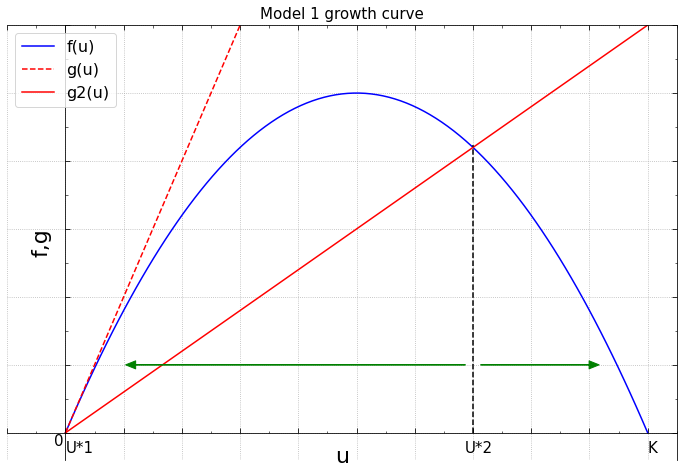

In [30]:
#Figure 1

#checking git

fig = plt.figure(figsize = (12,8))

ax = fig.add_subplot()
u = np.linspace(0,1,100)

e = 1
e2 = 0.3

# Functions
f = u*(1-u)
g = e*u
g2 = e2*u
h = 1-e2



# plot the function
plt.plot(u,f,label="f(u)" , color = 'b')
plt.plot(u,g, label = "g(u)",color = 'r',linestyle = '--')
plt.plot(u,g2,label = "g2(u)",color = 'r')
plt.grid(True)

#Straight line for u*1
x2_values = [1-e2, 1-e2]
y2_values = [0,0.212]
plt.plot(x2_values, y2_values,linestyle = '--',color = 'k')



# Move left y-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

#Format major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))

#Remove the tick labels but keep the ticks
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [item.get_text() for item in ax.get_yticklabels()]

empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
ax.set_yticklabels(empty_string_labels)

#Add tick marks to the top of plot and the right
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#Ticks face inward, major and minor
ax.tick_params(axis="y",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="y",direction="in",which='minor', pad= 10 , size = 2.5 )
ax.tick_params(axis="x",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="x",direction="in",which='minor', pad= 10 , size = 2.5 )


#arrows
plt.annotate('', xy=(0.1,0.05), xytext=(0.69,0.05),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.8,tail_width=0','color': 'g'}, va='center')
plt.annotate('', xy=(0.92,0.05), xytext=(0.71,0.05),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.8,tail_width=0','color': 'g'}, va='center')
#Steady state annotation
ax.annotate("U*2", xy=(0.7-0.015,-0.015),size = 15)
ax.annotate("U*1", xy=(0,-0.015),size = 15)
ax.annotate("0", xy=(-0.02,-0.01),size = 15)
ax.annotate("K", xy=(1,-0.015),size = 15)

# Create ranges for x-axis and y-axs
plt.xlim(-0.1,1.05,100)
plt.ylim(-0.02,0.3,100)

#Format intervals for major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))

plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 


plt.title('Model 1 growth curve' , size = 15)

plt.xlabel('u',size = 22)
plt.ylabel('f,g' ,size = 22)

plt.legend(loc="best",fontsize=16)

plt.grid(True, linestyle = 'dotted')
plt.show()

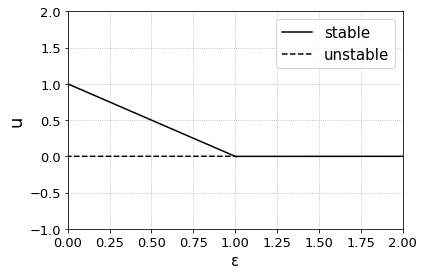

In [34]:

#Figure 2
#Create a bifurcation diagram - transcitical bifurcation 


def birfucation_plot(f,f_u,e,u,elabel='e'):
    """ produce a bifurcation diagram for a function f(u,e) given
        f and its partial derivative f_u(e,u) over a domain given by numpy arrays e and u
        f(e,u)  :  RHS function of autonomous ode dx/dt = f(e,x)
        f_u(e,u):  partial derivative of f with respect to u
        e       :  numpy array giving e coordinates of domain
        u       :  numpy array giving u coordinates of domain
        elabel  :  string for e axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    E,U = np.meshgrid(e,u)
    #fig = plt.figure(figsize = (12,8))
    #ax = fig.add_subplot()
    plt.figure()
    CS = plt.contour(E,U,f(E,U),[0],colors='k')
    plt.clf()
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        ve = vertices[:,0]
        vu = vertices[:,1]
        mask = np.sign(f_u(ve,vu))
        stable = mask < 0.
        unstable = mask > 0.
        # plot the stable and unstable branches for each path
        plt.plot(ve[stable],vu[stable],'k',linewidth=1.5)
       # plt.hold(True)
        plt.plot(ve[unstable],vu[unstable],'k--',linewidth=1.5)
        plt.xticks(fontsize= 13) 
        plt.yticks(fontsize= 13) 


        
    plt.xlabel('{0}'.format(elabel),size=15)
    plt.ylabel('u',size=18)
    plt.legend(('stable','unstable'),loc='best',fontsize = 15)
    plt.xlim(e[0],e[-1])
    plt.ylim(u[0],u[-1])
    
    #ax.spines["top"].set_color("orange")
    #ax.spines["left"].set_bounds(-.5, .5)
    #ax.spines["right"].set_linestyle("--")
    #ax.spines["bottom"].set_linewidth(6)
    #ax.spines["bottom"].set_capstyle("round")
    #ax.set(xlabel="F", ylabel="g")

    
    
f = lambda e,u: u*(1.-u) - e*u
f_u = lambda e,u: 1. - 2.*u-e 

u = np.linspace(-0.01,2,1000)
e = np.linspace(-0.01,2,1000)


birfucation_plot(f,f_u,e,u,elabel='\u03B5')


plt.xlim(0,2,100)
plt.ylim(-1,2,100)


plt.grid(True, linestyle = 'dotted')

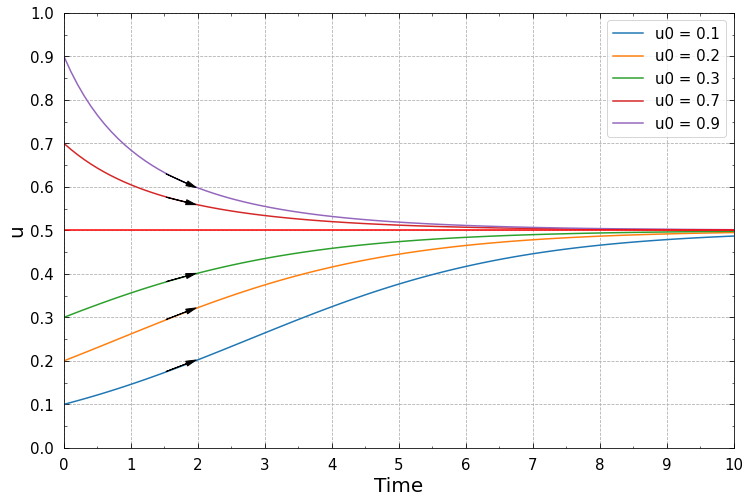

In [39]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

def sim(variables,t,params):
    u = variables[0]
    e = params[0]
    dUdt =  u*(1 - u)-e*u
    return([dUdt])

#Initial conditions
u0 = 0.1
u1 = 0.2
u2 = 0.3
u3 = 0.7
u4 = 0.9

t = np.linspace(0,10,100)
e = 0.5

params = [e]

#Simulation based on different initial conditions
y0 = odeint(sim,u0,t,args = (params,))
y1 = odeint(sim,u1,t,args = (params,))
y2 = odeint(sim,u2,t,args = (params,))
y3 = odeint(sim,u3,t,args = (params,))
y4 = odeint(sim,u4,t,args = (params,))

#ax.grid(True)
plt.plot(t,y0[:,0],label= "u0 = 0.1")
plt.plot(t,y1[:,0],label="u0 = 0.2")
plt.plot(t,y2[:,0],label="u0 = 0.3")
plt.plot(t,y3[:,0],label="u0 = 0.7")
plt.plot(t,y4[:,0],label="u0 = 0.9")
#plt.axhline(y=0.5, color='k', linestyle='-',linewidth=1)

#Add tick marks to the top of plot and the right
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#Ticks face inward, major and minor
ax.tick_params(axis="y",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="y",direction="in",which='minor', pad= 10 , size = 2.5 )
ax.tick_params(axis="x",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="x",direction="in",which='minor', pad= 10 , size = 2.5 )

#Format major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))

plt.xlabel('Time',size = 20)
plt.ylabel('u',size=20)
plt.legend(loc="best",fontsize = 15)
plt.ylim(0,1)
plt.xlim(t[0],t[-1])

#Tick label size
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 

xstart = 1.5
xend = 2
ystart = 15
yend = 20

plt.axhline(y=0.5, color='r', linestyle='-')


plt.annotate('', xy=(xend,y0[yend]), xytext=(xstart,y0[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y1[yend]), xytext=(xstart,y1[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y2[yend]), xytext=(xstart,y2[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y3[yend]), xytext=(xstart,y3[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y4[yend]), xytext=(xstart,y4[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')



plt.grid(True, linestyle = '--')
plt.show()

#The biological interpretation 
#The diagram shows solution trajectories for the logistic equations.
#There is one solution U^*(t) that every solution u(t) appreoaches.
#The population increases or decreases asymptotically until reaching the  carrying capacity k = 0.5.


# Model 2 -------------------------------------------------------------------------------

<ipython-input-167-895b955fbbb4>:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(empty_string_labels)
<ipython-input-167-895b955fbbb4>:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(empty_string_labels)


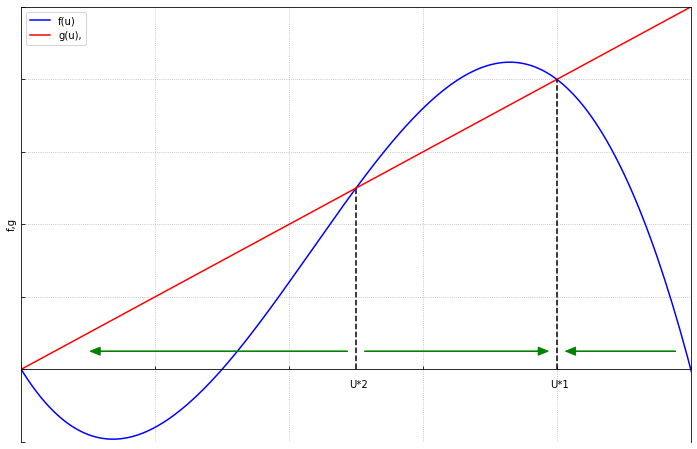

In [167]:

# Figure 1
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

#Define variables
u = np.linspace(0, 1.1, 200)
c = 0.3
gradient = ((2 - 3*u)*u + c*(-1 + 2*u))
e = 0.1
f = u*(u-c)*(1-u)
g = e*u
e2 = gradient
g2 = e2*u
e3 = 0.123
g3 = e3*u

#Find the points in which curves cross
#Intersection of f and g
fgintersect = np.argwhere(np.diff(np.sign(f - g))).flatten()
#Intersection of f and g2 - point where g is tangential to f 
ftangentg = np.argwhere(np.diff(np.sign(f - g2))).flatten()
#plt.plot(u[fgintersect], f[fgintersect], 'ro')
#plt.plot(u[ftangentg], f[ftangentg], 'ro')

#Find x and y co-ordinate for intersection of f and g
first_line = LineString(np.column_stack((u, f)))
second_line = LineString(np.column_stack((u, g)))
intersection = first_line.intersection(second_line)
x1, y1 = LineString(intersection).xy

#Find x and y co-ordinate for intersection of f and g2
#harvesting function is tangential to population function
first_line2 = LineString(np.column_stack((u, f)))
second_line2 = LineString(np.column_stack((u, g2)))
intersection2 = first_line2.intersection(second_line2)
x2, y2 = LineString(intersection2).xy

#Move left y-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

#Eliminate upper and right axes
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#plt.axhline(y=-0.02, color='k', linestyle='-')

#Annotations for first and second steady states
ax.annotate("U*1", xy=(x1[2]-0.01,-0.005),size = 10)
ax.annotate("U*2", xy=(x1[1]-0.01,-0.005),size = 10)

#Plot f and g
plt.plot(u,f,label="f(u)" , color = 'b')
plt.plot(u,g, label = "g(u),", color = 'r',linestyle = '-')
#plt.plot(u,g3, label = "g(u),")

#plot straight lines
#X and Y values of intersection the tangent point of f and g
#x_values = [x[1], x[1]]
#y_values = [0,y[1]]
#plt.plot(x_values, y_values)

#Straight line for u*1
x2_values = [x1[1], x1[1]]
y2_values = [0,y1[1]]
plt.plot(x2_values, y2_values,linestyle = '--',color = 'k')
#Straight line for u*2
x2_values = [x1[2], x1[2]]
y2_values = [0,y1[2]]
plt.plot(x2_values, y2_values, linestyle = '--',color = 'k')

#Remove the tick labels but keep the ticks
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [item.get_text() for item in ax.get_yticklabels()]

empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
ax.set_yticklabels(empty_string_labels)

#Turn the tickmarks inward towards the plot , the padding affects the text not the ticks
ax.tick_params(axis="y",direction="in", pad=-22)
ax.tick_params(axis="x",direction="in", pad=-15)

#arrows

plt.annotate('', xy=(0.1,0.005), xytext=(0.49,0.005),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.8,tail_width=0','color': 'g'}, va='center')
plt.annotate('', xy=(0.79,0.005), xytext=(0.51,0.005),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.8,tail_width=0','color': 'g'}, va='center')
plt.annotate('', xy=(0.81,0.005), xytext=(0.98,0.005),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.8,tail_width=0','color': 'g'}, va='center')

#create ranges for x-axis and y-axs
plt.xlim(0,1)
plt.ylim(-0.02,0.1)
# X and y axis labels
plt.xlabel('')
plt.ylabel('f,g')
plt.legend(loc="upper left")

plt.grid(True, linestyle = 'dotted')
plt.show()


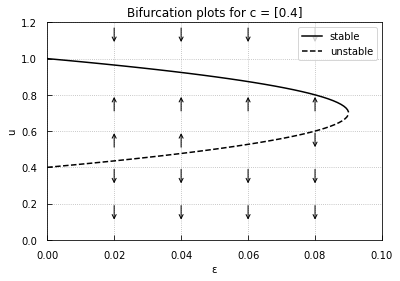

In [13]:
#Model 2 bifurcation diagrams 
def birfucation_plot(f,f_u,e,u,elabel='e'):
    """ produce a bifurcation diagram for a function f(u,e) given
        f and its partial derivative f_u(e,u) over a domain given by numpy arrays e and u
        f(e,u)  :  RHS function of autonomous ode dx/dt = f(e,x)
        f_u(e,u):  partial derivative of f with respect to u
        e       :  numpy array giving e coordinates of domain
        u       :  numpy array giving u coordinates of domain
        elabel  :  string for e axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    E,U = np.meshgrid(e,u)
    #fig = plt.figure(figsize = (12,8))
    #ax = fig.add_subplot()
    plt.figure()
    CS = plt.contour(E,U,f(E,U),[0],colors='k')
    plt.clf()
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        ve = vertices[:,0]
        vu = vertices[:,1]
        mask = np.sign(f_u(ve,vu))
        stable = mask < 0.
        unstable = mask > 0.
        # plot the stable and unstable branches for each path
        plt.plot(ve[stable],vu[stable],'k',linewidth=1.5)
       # plt.hold(True)
        plt.plot(ve[unstable],vu[unstable],'k--',linewidth=1.5)
        
        
    plt.xlabel('{0}'.format(elabel))
    plt.ylabel('u')
    plt.legend(('stable','unstable'),loc='best')
    plt.xlim(e[0],e[-1])
    plt.ylim(u[0],u[-1])


    
f = lambda e,u: (u-c) * (1-u) - e
f_u = lambda e,u: 1-2*u+c

u = np.linspace(0,1,100)
e = np.linspace(0,.1,100)
c = 0.4

#f2 = lambda e,u: (u-c2) * (1-u) - e
#f_u2 = lambda e,u: 1-2*u+c2

#u = np.linspace(0,1.,100)
#e = np.linspace(0,.4,100)
#c2 = 0.1


a = birfucation_plot(f,f_u,e,u,elabel='\u03B5')
plt.title('Bifurcation plots for c = [0.4]')
plt.grid()
#b = birfucation_plot(f2,f_u2,e,u,elabel='\u03B5')
plt.grid(True, linestyle = 'dotted')

plt.xlim(0,0.1,1000)
plt.ylim(0,1.2,1000)

#Up arrows
plt.annotate('', xy=(0.02,0.6), xytext=(0.02,0.5),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.02,0.8), xytext=(0.02,0.7),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.04,0.6), xytext=(0.04,0.5),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.04,0.8), xytext=(0.04,0.7),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.06,0.8), xytext=(0.06,0.7),arrowprops={'arrowstyle': '->'}, va='center')
#Down arrows
plt.annotate('', xy=(0.02,0.3), xytext=(0.02,0.4),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.02,0.1), xytext=(0.02,0.2),arrowprops={'arrowstyle': '->'}, va='center')

plt.annotate('', xy=(0.04,0.3), xytext=(0.04,0.4),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.04,0.1), xytext=(0.04,0.2),arrowprops={'arrowstyle': '->'}, va='center')

plt.annotate('', xy=(0.02,1.08), xytext=(0.02,1.18),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.04,1.08), xytext=(0.04,1.18),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.06,1.08), xytext=(0.06,1.18),arrowprops={'arrowstyle': '->'}, va='center')

plt.annotate('', xy=(0.06,0.3), xytext=(0.06,0.4),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.06,0.1), xytext=(0.06,0.2),arrowprops={'arrowstyle': '->'}, va='center')


plt.annotate('', xy=(0.08,1.08), xytext=(0.08,1.18),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.08,0.8), xytext=(0.08,0.7),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.08,0.5), xytext=(0.08,0.6),arrowprops={'arrowstyle': '->'}, va='center')


plt.annotate('', xy=(0.08,0.3), xytext=(0.08,0.4),arrowprops={'arrowstyle': '->'}, va='center')
plt.annotate('', xy=(0.08,0.1), xytext=(0.08,0.2),arrowprops={'arrowstyle': '->'}, va='center')

plt.tick_params(axis="y",direction="in", pad= 10 , size = 5 )
plt.tick_params(axis="x",direction="in", pad= 10 , size = 5 )

#plt.arrow(0.02,0,0,0.29,length_includes_head=True, head_width=0.015,color = 'k')
#plt.arrow(0.04,0,0,0.35,length_includes_head=False, head_width=0.01,color = 'k')





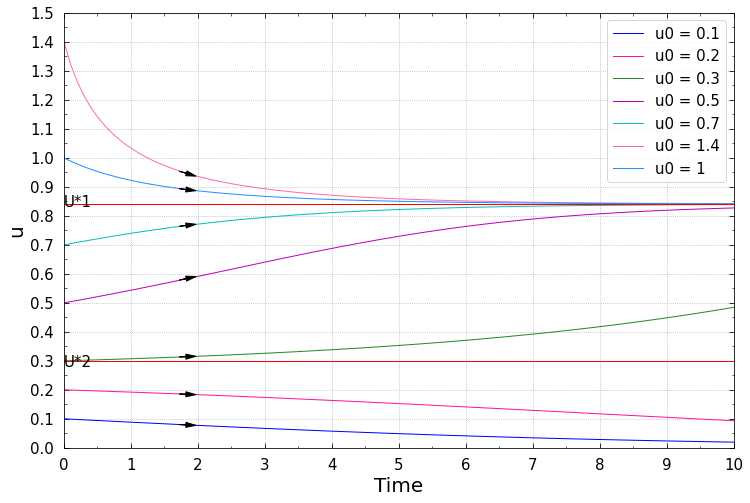

In [42]:
#Model 2 create simulations 

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

#Simulation function
def sim(variables,t,params):
    u = variables[0]
    e = params[0]
    dUdt =  u * (u-c) * (1-u) - e*u
    return([dUdt])


#Initial conditions
u0 = 0.1
u1 = 0.2
u2 = 0.3
u3 = 0.5
u4 = 0.7
u5 = 1.4
u6 = 1

#t, e and c
t = np.linspace(0,10,100)
e = 0.118
#e = 1.2
c = 0.1

params = [e]

#Create simulations
y0 = odeint(sim,u0,t,args = (params,))
y1 = odeint(sim,u1,t,args = (params,))
y2 = odeint(sim,u2,t,args = (params,))
y3 = odeint(sim,u3,t,args = (params,))
y4 = odeint(sim,u4,t,args = (params,))
y5 = odeint(sim,u5,t,args = (params,))
y6 = odeint(sim,u6,t,args = (params,))

colors = np.array(['b', 'deeppink','forestgreen', 'm', 'c','hotpink','dodgerblue'])

#Plot simulations with different initial conditons
plt.plot(t,y0[:,0],label= "u0 = " + str(u0) ,linewidth = 1 , color = colors[0])
plt.plot(t,y1[:,0],label="u0 = " + str(u1) ,linewidth = 1,color = colors[1])
plt.plot(t,y2[:,0],label="u0 = " + str(u2),linewidth = 1, color = colors[2])
plt.plot(t,y3[:,0],label="u0 = " + str(u3) ,linewidth = 1,color = colors[3])
plt.plot(t,y4[:,0],label="u0 = " + str(u4),linewidth = 1,color = colors[4])
plt.plot(t,y5[:,0],label="u0 = " + str(u5),linewidth = 1,color = colors[5])
plt.plot(t,y6[:,0],label="u0 = " + str(u6),linewidth = 1,color = colors[6])

#Vertical lines at steady states
plt.axhline(y=0.84, color='r', linestyle='-',linewidth=1)
plt.axhline(y=0.3, color='r', linestyle='-',linewidth=1)

ax.annotate("U*1", xy=(0,0.83),size = 15)
ax.annotate("U*2", xy=(0,0.28),size = 15)

#Create arrows on curve
xstart = 1.7
xend = 2
ystart = 17
yend = 20

plt.annotate('', xy=(xend,y0[yend]), xytext=(xstart,y0[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y1[yend]), xytext=(xstart,y1[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y2[yend]), xytext=(xstart,y2[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y3[yend]), xytext=(xstart,y3[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y4[yend]), xytext=(xstart,y4[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y5[yend]), xytext=(xstart,y5[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y6[yend]), xytext=(xstart,y6[ystart]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')


#Add tick marks to the top of plot and the right
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#Ticks face inward, major and minor
ax.tick_params(axis="y",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="y",direction="in",which='minor', pad= 10 , size = 2.5 )
ax.tick_params(axis="x",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="x",direction="in",which='minor', pad= 10 , size = 2.5 )


#Format major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))

#Format major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))

#Tick label size
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 


plt.xlabel('Time',size=20)
plt.ylabel('u',size=20)
plt.legend(loc="best",fontsize=15)

plt.ylim(0,1.5)
plt.xlim(t[0],t[-1])

plt.grid(True, linestyle = 'dotted')
plt.show()

# Model 3 -------------------------------------------------------------------------------  

In [166]:
#Description of Parameters in the Predator prey model
from tabulate import tabulate


#DNdt = r*N(1-N/K)-E*N - c*N*P
print('DNdt')
print(tabulate([['N', 'Population','--'],['K','Population','--'],['P','Population','--'],['r','1/t','rate per unit time'],
['t', 'time','--'],['E','1/time','--'],['c', '1/(population*time)','per unit population per unit time']], 
               headers=['Parameter', 'Units','Description']))
#DPdt = r1*P(1-b(P/N))
print('')
print('DPdT')
print(tabulate([['N', 'Population','--'],['P','Population','--'],['b','dimensionless','--'],['r','1/t','rate per unit time']], headers=['Parameter', 'Units','Description']))

#Carrying out the non dimensionalisation 

print("________________________________________________________________________\n")
#\u03B1 = alpha
print("\u03B1 has dimensions of population")
#\u03B2 = beta
print("\u03B2 has dimensions of population")
#\u03B3 = gamma
print("\u03B3 has dimensions of 1/time")


#Dn(t)/d(T) = 


DNdt
Parameter    Units                Description
-----------  -------------------  ---------------------------------
N            Population           --
K            Population           --
P            Population           --
r            1/t                  rate per unit time
t            time                 --
E            1/time               --
c            1/(population*time)  per unit population per unit time

DPdT
Parameter    Units          Description
-----------  -------------  ------------------
N            Population     --
P            Population     --
b            dimensionless  --
r            1/t            rate per unit time
________________________________________________________________________

α has dimensions of population
β has dimensions of population
γ has dimensions of 1/time


<ipython-input-148-ee6efb6afe50>:20: RuntimeWarning: invalid value encountered in true_divide
  dvdt = ro*v*(1-b*(v/u))


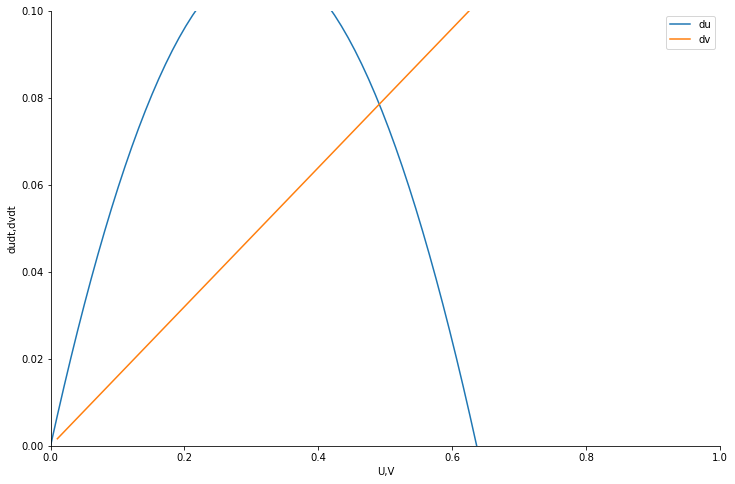

In [148]:
#Figure 1
# Formatting



fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

u = np.linspace(0,1,100)
v = np.linspace(0,1,100)
t = np.linspace(0,1,100)

eplon = 0.3
ro = 0.2 
b = 0.2
c = 0.1

# Functions
dudt = u*(1-u)-eplon*u-c*u*v
dvdt = ro*v*(1-b*(v/u))


# plot the function
plt.plot(u,dudt,label="du")
plt.plot(v,dvdt, label = "dv")
#plt.plot(v,dvdt, label = "dv")
plt.grid(True)

# Move left y-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Create ranges for x-axis and y-axs
plt.xlim(0,1,100)
plt.ylim(0,0.1,100)

plt.xlabel('U,V')
plt.ylabel('dudt,dvdt')

plt.legend(loc="best")
plt.grid()
plt.show()

<ipython-input-147-157b9244118a>:16: RuntimeWarning: invalid value encountered in true_divide
  dPdt = r*P*(1 - b*(P/N))


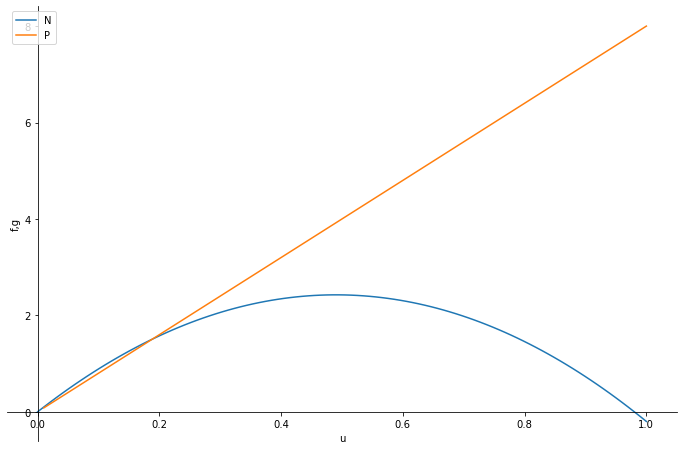

In [147]:
# Formatting

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

E = 0.1
b = 0.2
c = 0.1
r = 10
K = 1

N = np.linspace(0,1,100)
P = np.linspace(0,1,100)

dNdt = r*N*(1 - (N/K))-E*N-c*N*P     
dPdt = r*P*(1 - b*(P/N))

# plot the function
plt.plot(N,dNdt,label="N")
plt.plot(P,dPdt, label = "P")
plt.grid(True)

# Move left y-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Create ranges for x-axis and y-axs
#plt.xlim(0,1,100)
#plt.ylim(0,1,100)

plt.xlabel('u')
plt.ylabel('f,g')

plt.legend(loc="best")

plt.grid()
plt.show()

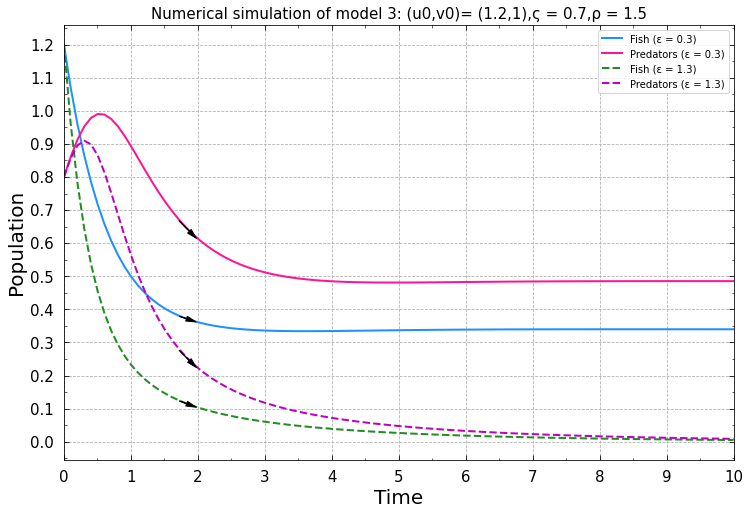

In [17]:
#Model 3 simulations 

#Define initial conditons

u0 = [1.2,0.8] ##Define initial conditons, 10 prey , 1 predator 

#define set of time points that we are solving over , unit of time in unspecified
#What unit of time should we use? maybe days 
t = np.linspace(0,10 ,100)

b = 0.7
c = 0.3
#epsilon = 0.2
rho = 1.5
epsilon = 0.175
epsilon2 = 1.3

params = [b,c,epsilon,rho]
params2 = [b,c,epsilon2,rho]

def sim(variables,t,paramas):
    #Fish population
    u = variables[0]
    #Predator population level
    v = variables[1]
    
    #Redefine paramters within the functions 
    b = params[0]
    c = params[1]
    epsilon = params[2]
    rho = params[3]
    
    #Define ODES
    dudt = u * (1-u) - epsilon * u -  u * v
    dvdt = rho * v * (1 - (b * v) / u) 
    
    return(dudt,dvdt)

def sim2(variables,t,paramas2):
    #Fish population
    u = variables[0]
    #Predator population level
    v = variables[1]
    
    #Redefine paramters within the functions 
    b = params2[0]
    c = params2[1]
    epsilon = params2[2]
    rho = params2[3]
    
    #Define ODES
    dudt = u * (1-u) - epsilon * u - u * v
    dvdt = rho * v * (1 - (b * v) / u) 
    
    return(dudt,dvdt)

#The output
y = odeint(sim,u0,t,args = (params,))
y2 = odeint(sim2,u0,t,args = (params2,))
#Define a plot with 2 sub plots , ax1 and ax2
#sublots(2) for 2 subplts

fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()

colors = np.array(['b', 'deeppink','forestgreen', 'm', 'c','hotpink','dodgerblue'])

plt.plot(t,y[:,0],label= "Fish (\u03B5 = 0.3)" , linewidth = 2 , color = colors[6])
plt.plot(t,y[:,1],label= "Predators (\u03B5 = 0.3)",linewidth = 2 , color = colors[1])

plt.plot(t,y2[:,0],label= "Fish (\u03B5 = 1.3)" , linewidth = 2, color = colors[2],linestyle = '--')
plt.plot(t,y2[:,1],label= "Predators (\u03B5 = 1.3)",linewidth = 2, color = colors[3],linestyle = '--')

#Add tick marks to the top of plot and the right
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#Ticks face inward, major and minor
ax.tick_params(axis="y",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="y",direction="in",which='minor', pad= 10 , size = 2.5 )
ax.tick_params(axis="x",direction="in", pad= 10 , size = 5 )
ax.tick_params(axis="x",direction="in",which='minor', pad= 10 , size = 2.5 )

plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 

#Format major and minor tick marks on x and y axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))


xstart = 1.7
xend = 2
ystart = 17
yend = 20

plt.annotate('', xy=(xend,y[yend,0]), xytext=(xstart,y[ystart,0]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y[yend,1]), xytext=(xstart,y[ystart,1]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y2[yend,0]), xytext=(xstart,y2[ystart,0]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
plt.annotate('', xy=(xend,y2[yend,1]), xytext=(xstart,y2[ystart,1]),arrowprops={'arrowstyle': 'simple,head_length=1,head_width=0.5,tail_width=0','color': 'k'}, va='center')
#Labels and legend
plt.legend(loc="best")
ax.set_ylabel('Population',size = 20)
ax.set_xlabel('Time',size = 20)
#X and Y axis limits
#plt.ylim(0,8)
plt.xlim(t[0],t[-1])
#Titl

plt.title('Numerical simulation of model 3: (u0,v0)= (1.2,1),\u03C2 = 0.7,\u03C1 = 1.5' , size = 15)

plt.grid(True, linestyle = '--')
plt.show()

In [4]:
#Phase 

u, v  = np.meshgrid(np.linspace(0, 1,100), np.linspace(0,1,100))

# since x + y + z = c, which is an invariant 2D plane, set up an initial c:  
e = 0.3
c=0.1
b=0.3
p=1

# this is simply matrix implementation of your code, since numpy is much faster at 
# calculating matrices than running for loops:
y = u*(1-u)-e*u-c*u*v
g = p*v(1-((b*v)/u))

plt.streamplot(u, v, y, g)
#plt.axis('square')#cube???
#plt.axis([-3, 3, -3, 3])
plt.show()

<ipython-input-4-c593830c0275>:14: RuntimeWarning: divide by zero encountered in true_divide
  g = p*v(1-((b*v)/u))
<ipython-input-4-c593830c0275>:14: RuntimeWarning: invalid value encountered in true_divide
  g = p*v(1-((b*v)/u))


TypeError: 'numpy.ndarray' object is not callable